In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

In [2]:
df=sns.load_dataset('iris')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
x_f=df.columns
x_f

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [7]:
target_y=df.species.unique()
target_y

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [8]:
df['species'].replace(target_y,[0, 1,2], inplace=True)

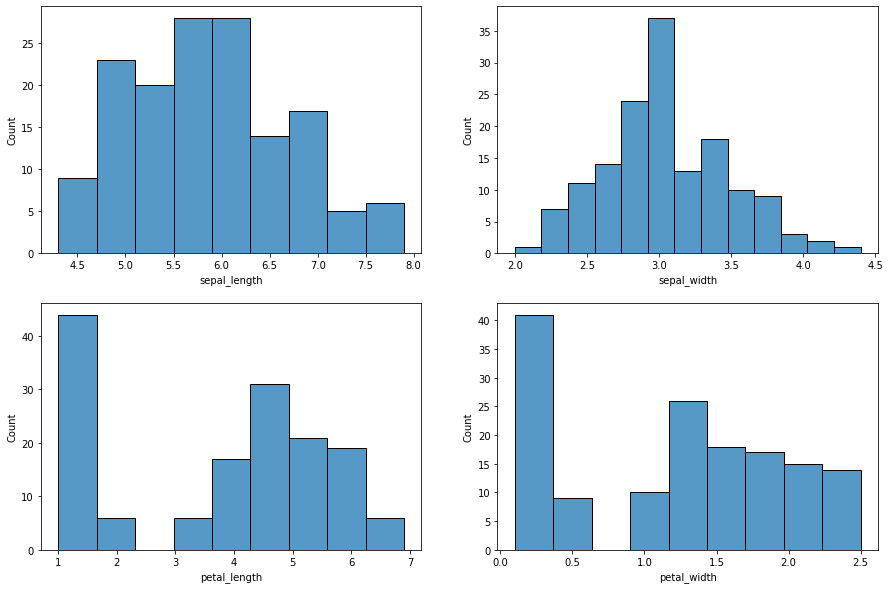

In [14]:
index=1
plt.figure(figsize=(15,10))
for col in x_f[:-1]:
    plt.subplot(2,2,index)
    index=index+1
    sns.histplot(x=df[col],)

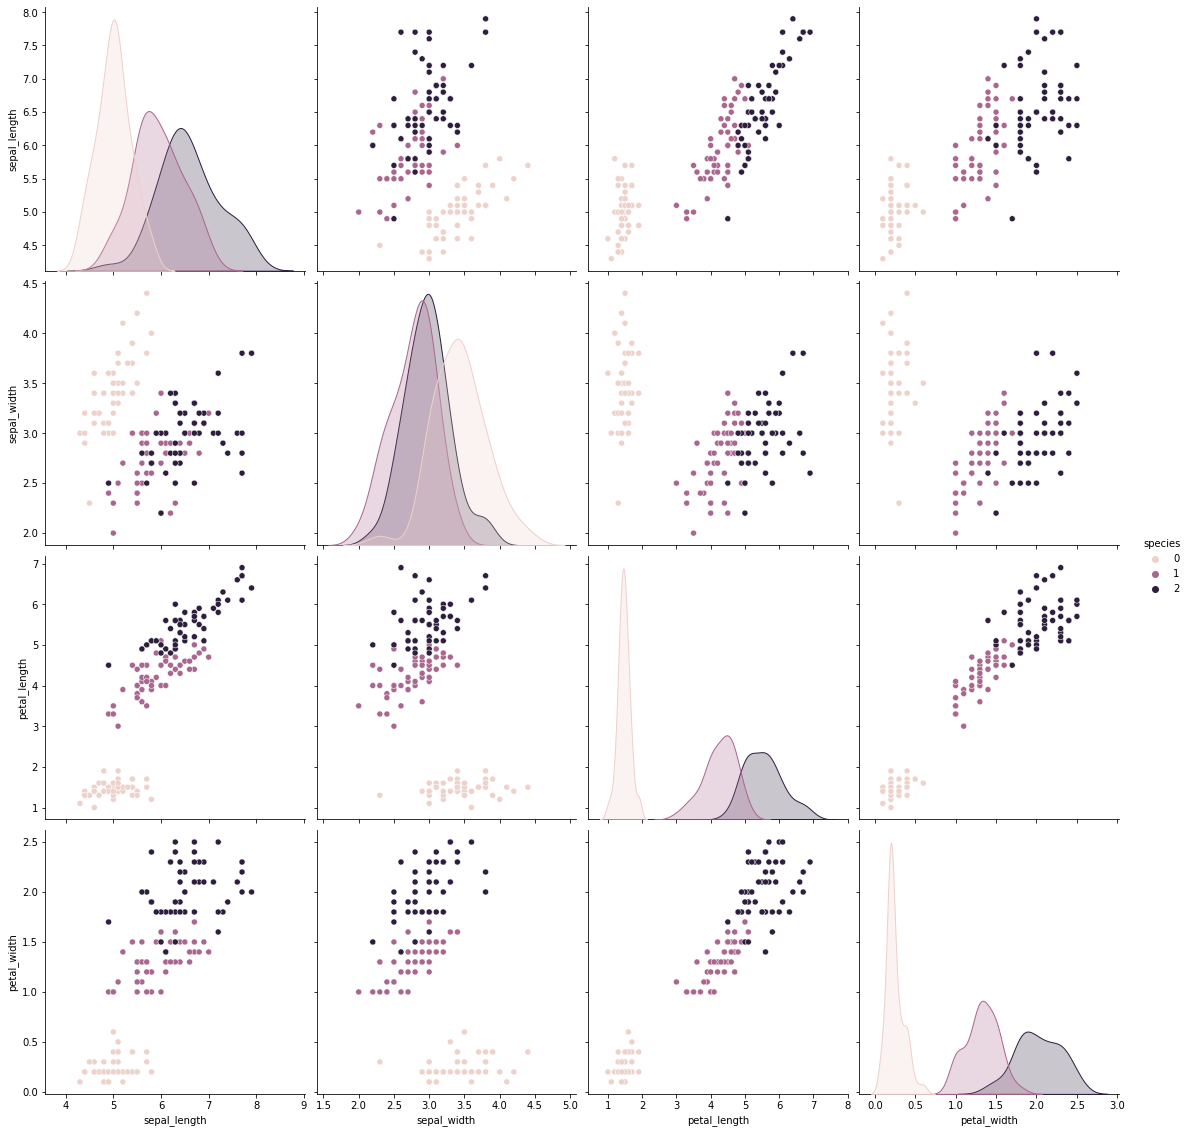

In [17]:
sns.pairplot(df,hue='species',height=4)

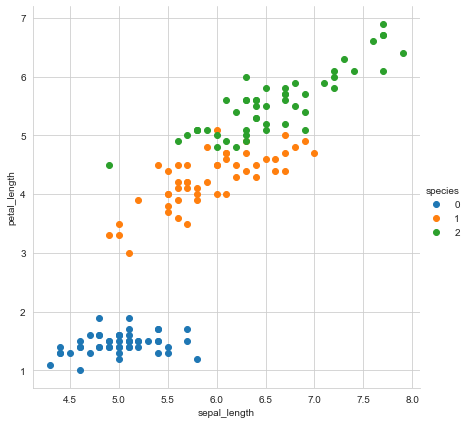

In [19]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue ="species",height = 6).map(plt.scatter, 'sepal_length','petal_length').add_legend()

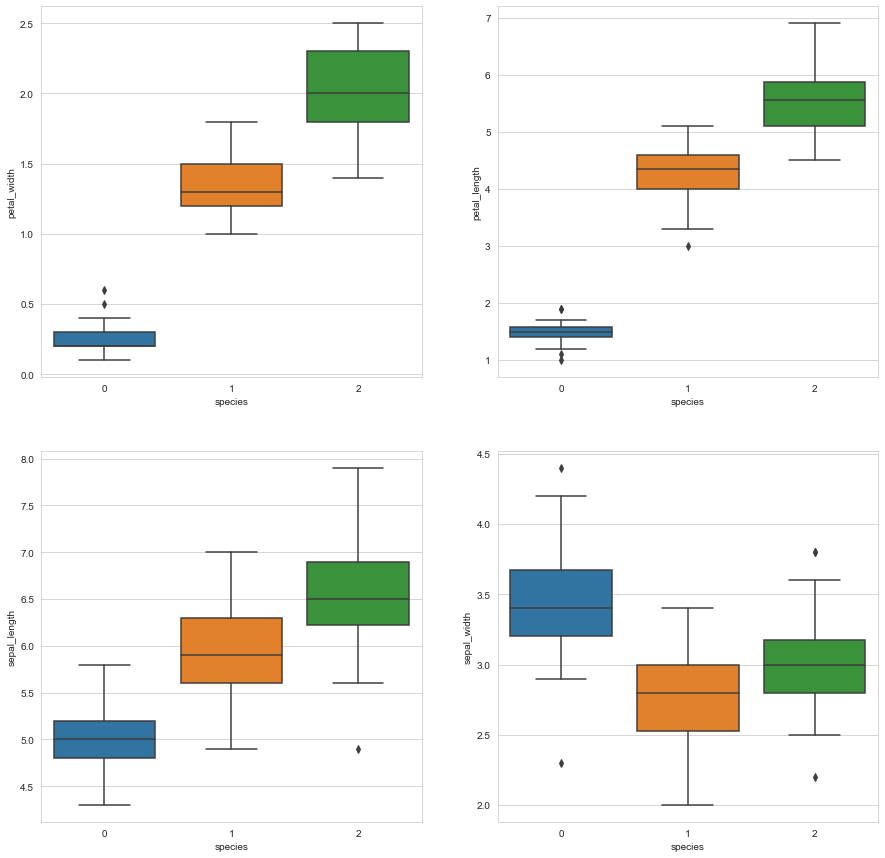

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(15,15))
sns.boxplot( y='petal_width', x= 'species', data=df, orient='v' , ax=axes[0, 0])
sns.boxplot( y='petal_length', x= 'species', data=df, orient='v' , ax=axes[0, 1])
sns.boxplot( y='sepal_length', x= 'species', data=df, orient='v' , ax=axes[1, 0])
sns.boxplot( y='sepal_width', x= 'species', data=df, orient='v' , ax=axes[1, 1])
plt.show()

In [25]:

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [27]:
X = df.iloc[:, :4]
y = df.iloc[:, -1]
 


    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print( "SCORE :",model.score(X_test,y_test))

SCORE : 1.0


In [31]:
from sklearn.metrics import confusion_matrix,classification_report
y_predict=model.predict(X_test)

cf=confusion_matrix(y_test,y_predict)


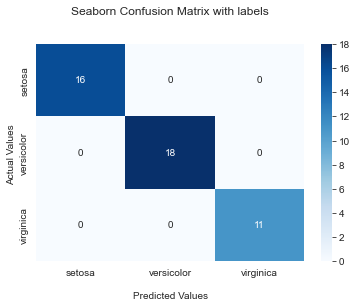

In [33]:
import seaborn as sns

ax = sns.heatmap(cf, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['setosa', 'versicolor', 'virginica'])
ax.yaxis.set_ticklabels(['setosa', 'versicolor', 'virginica'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [34]:
print(classification_report(y_test,y_predict,target_names=['setosa', 'versicolor', 'virginica']))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      1.00      1.00        18
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

